1. **What is a Support Vector Machine (SVM)?**  
A supervised learning algorithm that finds the optimal hyperplane to separate classes.

2. **What is the difference between Hard Margin and Soft Margin SVM?**  
Hard Margin requires perfect separation; Soft Margin allows misclassifications to handle noisy data.

3. **What is the mathematical intuition behind SVM?**  
Maximize the margin between classes while minimizing classification errors.

4. **What is the role of Lagrange Multipliers in SVM?**  
They help solve the optimization problem by enforcing constraints mathematically.

5. **What are Support Vectors in SVM?**  
Data points closest to the decision boundary that define the margin.

6. **What is a Support Vector Classifier (SVC)?**  
An SVM model used for classification tasks.

7. **What is a Support Vector Regressor (SVR)?**  
An SVM model used for regression tasks, fitting within a margin of tolerance.

8. **What is the Kernel Trick in SVM?**  
Transforms data into higher dimensions to make it linearly separable.

9. **Compare Linear Kernel, Polynomial Kernel, and RBF Kernel?**  
- Linear: best for linearly separable data.  
- Polynomial: captures complex relationships with polynomial features.  
- RBF: handles non-linear data using similarity measures.

10. **What is the effect of the C parameter in SVM?**  
Controls trade-off between margin size and classification errors (regularization strength).

11. **What is the role of the Gamma parameter in RBF Kernel SVM?**  
Defines influence of a single training point; high gamma = tighter boundaries.

12. **What is the Naïve Bayes classifier, and why is it called "Naïve"?**  
A probabilistic classifier assuming independence among features, hence “naïve.”

13. **What is Bayes’ Theorem?**  
A formula to calculate conditional probability:  
\[
P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}
\]

14. **Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes?**  
- Gaussian: assumes continuous features follow normal distribution.  
- Multinomial: works with count data (e.g., word frequencies).  
- Bernoulli: works with binary features (present/absent).

15. **When should you use Gaussian Naïve Bayes over other variants?**  
When features are continuous and approximately normally distributed.

16. **What are the key assumptions made by Naïve Bayes?**  
Features are conditionally independent given the class.

17. **What are the advantages and disadvantages of Naïve Bayes?**  
- Advantages: simple, fast, works well with small data.  
- Disadvantages: independence assumption often unrealistic, less accurate with correlated features.

18. **Why is Naïve Bayes a good choice for text classification?**  
Efficient with high-dimensional sparse data and performs well with word frequencies.

19. **Compare SVM and Naïve Bayes for classification tasks?**  
- SVM: better for complex boundaries, robust but slower.  
- Naïve Bayes: faster, good for text, but weaker with correlated features.

20. **How does Laplace Smoothing help in Naïve Bayes?**  
Prevents zero probability for unseen features by adding a small constant to counts.


In [ ]:
#21: Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy:

# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data      # Features
y = iris.target    # Labels

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the SVM classifier
svm_model = SVC(kernel='linear')   # You can try 'rbf', 'poly' as well
svm_model.fit(X_train, y_train)

# Predict on test set
y_pred = svm_model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Classifier Accuracy on Iris dataset:", accuracy)




SVM Classifier Accuracy on Iris dataset: 1.0


In [ ]:
#22: Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies:


# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Wine dataset
wine = datasets.load_wine()
X = wine.data      # Features
y = wine.target    # Labels

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train SVM with Linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# Compare accuracies
print("Accuracy with Linear Kernel:", accuracy_linear)
print("Accuracy with RBF Kernel:", accuracy_rbf)


Accuracy with Linear Kernel: 0.9444444444444444
Accuracy with RBF Kernel: 0.6944444444444444


In [28]:
#23: Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 4. Train SVR model (using RBF kernel)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# 5. Predict on test set
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 6. Evaluate using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 0.32654986710621986


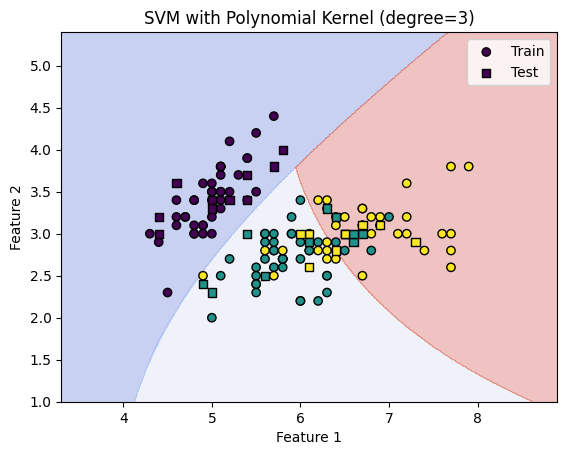

In [3]:
#24: Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1. Load a dataset (we'll use only 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]   # Take first two features for 2D plotting
y = iris.target

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM with Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0)
svm_poly.fit(X_train, y_train)

# 4. Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# 5. Predict over the grid
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# 6. Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label="Test")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("SVM with Polynomial Kernel (degree=3)")
plt.legend()
plt.show()


In [4]:
#25: Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy:

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data      # Features
y = data.target    # Labels

# 2. Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train Gaussian Naïve Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 4. Predict on test set
y_pred = gnb.predict(X_test)

# 5. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Gaussian Naïve Bayes Accuracy on Breast Cancer dataset:", accuracy)



Gaussian Naïve Bayes Accuracy on Breast Cancer dataset: 0.9385964912280702


In [5]:
#26: Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

# Import libraries
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load the 20 Newsgroups dataset
newsgroups = fetch_20newsgroups(subset='all')
X = newsgroups.data      # Text documents
y = newsgroups.target    # Labels (categories)

# 2. Convert text to feature vectors using Bag-of-Words
vectorizer = CountVectorizer(stop_words='english')
X_vectors = vectorizer.fit_transform(X)

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_vectors, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Multinomial Naïve Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# 5. Predict on test set
y_pred = mnb.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Multinomial Naïve Bayes Accuracy on 20 Newsgroups dataset:", accuracy)

# 7. Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Multinomial Naïve Bayes Accuracy on 20 Newsgroups dataset: 0.8779840848806366

Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.87      0.94      0.91       160
           comp.graphics       0.69      0.89      0.78       195
 comp.os.ms-windows.misc       0.96      0.23      0.38       197
comp.sys.ibm.pc.hardware       0.69      0.87      0.77       196
   comp.sys.mac.hardware       0.89      0.91      0.90       193
          comp.windows.x       0.76      0.90      0.83       198
            misc.forsale       0.93      0.79      0.85       195
               rec.autos       0.91      0.91      0.91       198
         rec.motorcycles       0.94      0.94      0.94       199
      rec.sport.baseball       0.96      0.96      0.96       199
        rec.sport.hockey       0.97      0.98      0.98       200
               sci.crypt       0.91      0.96      0.93       198
         sci.electronics       0.90   

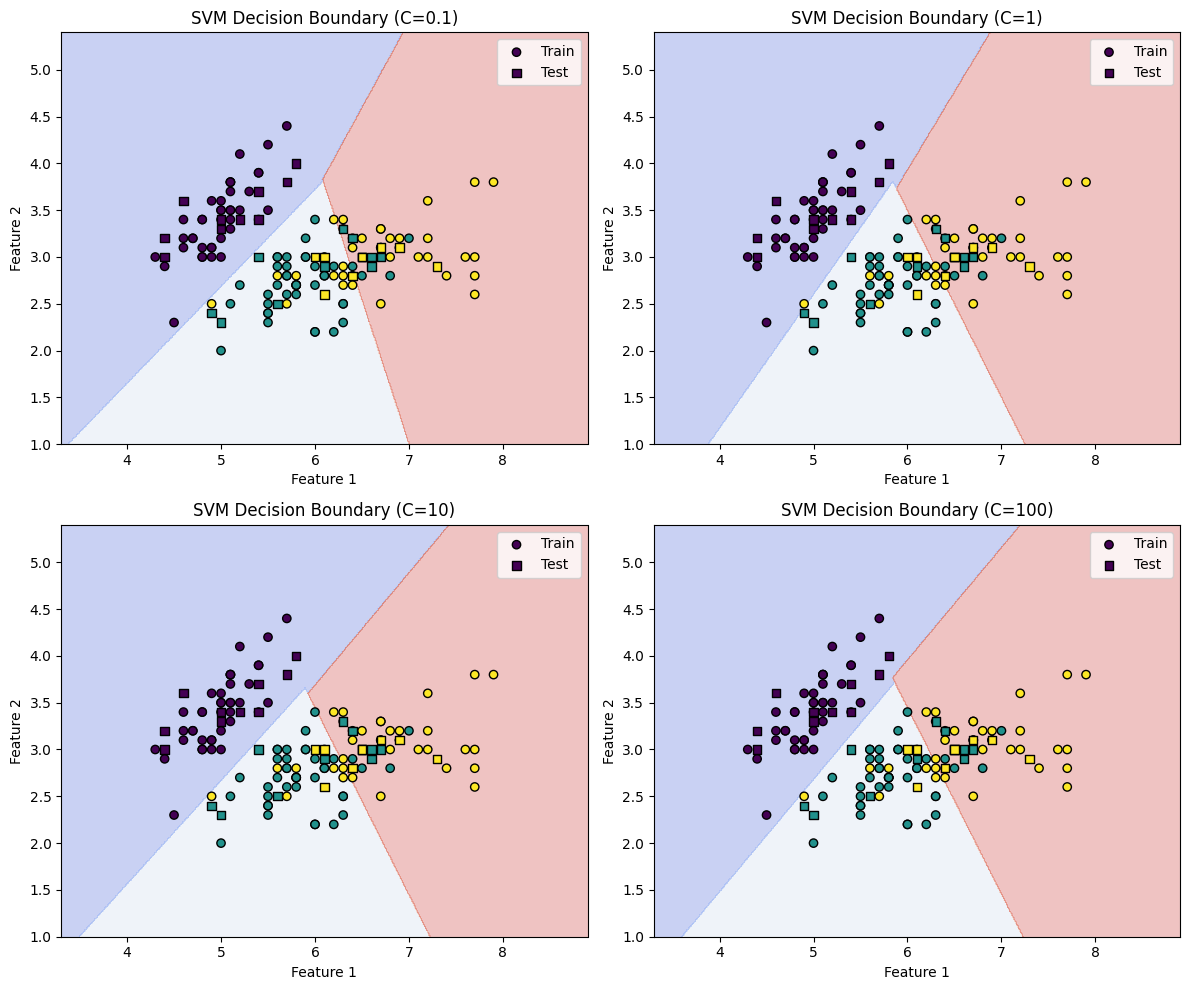

In [6]:
#27: Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually=

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# 1. Load dataset (Iris, only 2 features for visualization)
iris = datasets.load_iris()
X = iris.data[:, :2]   # First two features
y = iris.target

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Define different C values to compare
C_values = [0.1, 1, 10, 100]

# 4. Plot decision boundaries for each C
plt.figure(figsize=(12, 10))

for i, C in enumerate(C_values, 1):
    # Train SVM with linear kernel and given C
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)

    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predict over grid
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', edgecolors='k', label="Train")
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', edgecolors='k', label="Test")
    plt.title(f"SVM Decision Boundary (C={C})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.legend()

plt.tight_layout()
plt.show()



In [30]:
#28: Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features=

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings("ignore")

# 1. Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data      # Features (continuous)
y = data.target    # Labels (binary: malignant/benign)

# 2. Binarize features (convert to 0/1 based on threshold)
binarizer = Binarizer(threshold=0.0)   # threshold can be tuned
X_binary = binarizer.fit_transform(X)

# 3. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Train Bernoulli Naïve Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

# 5. Predict on test set
y_pred = bnb.predict(X_test)

# 6. Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Bernoulli Naïve Bayes Accuracy:", accuracy)

# 7. Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



Bernoulli Naïve Bayes Accuracy: 0.631578947368421

Classification Report:
               precision    recall  f1-score   support

   malignant       0.00      0.00      0.00        42
      benign       0.63      1.00      0.77        72

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



In [9]:
#29: Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM without scaling
svm_unscaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

# 4. Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Train SVM with scaled data
svm_scaled = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

# 6. Compare results
print("Accuracy without scaling:", accuracy_unscaled)
print("Accuracy with scaling:", accuracy_scaled)


Accuracy without scaling: 0.9298245614035088
Accuracy with scaling: 0.9824561403508771


In [10]:
#30: Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing=

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load dataset (Breast Cancer)
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train GaussianNB without Laplace smoothing (default var_smoothing=1e-9)
gnb_default = GaussianNB(var_smoothing=1e-9)
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

# 4. Train GaussianNB with stronger Laplace smoothing
gnb_smoothed = GaussianNB(var_smoothing=1e-2)  # larger smoothing
gnb_smoothed.fit(X_train, y_train)
y_pred_smoothed = gnb_smoothed.predict(X_test)
accuracy_smoothed = accuracy_score(y_test, y_pred_smoothed)

# 5. Compare results
print("Accuracy without Laplace Smoothing (var_smoothing=1e-9):", accuracy_default)
print("Accuracy with Laplace Smoothing (var_smoothing=1e-2):", accuracy_smoothed)

# Optional: Compare predictions directly
print("\nFirst 20 predictions without smoothing:", y_pred_default[:20])
print("First 20 predictions with smoothing:", y_pred_smoothed[:20])


Accuracy without Laplace Smoothing (var_smoothing=1e-9): 0.9385964912280702
Accuracy with Laplace Smoothing (var_smoothing=1e-2): 0.9122807017543859

First 20 predictions without smoothing: [0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1]
First 20 predictions with smoothing: [0 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1]


In [11]:
#31: Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

# Import libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load dataset (Iris for demonstration)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Define parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],   # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly'] # Different kernel types
}

# 4. Create SVM model
svm = SVC()

# 5. Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    scoring='accuracy',
    verbose=1,
    n_jobs=-1          # Use all CPU cores
)

grid_search.fit(X_train, y_train)

# 6. Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# 7. Evaluate on test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best SVM Model Accuracy on Test Set:", accuracy)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best SVM Model Accuracy on Test Set: 0.9666666666666667


In [12]:
#32: Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

# Import libraries
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

# 1. Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, n_clusters_per_class=1,
                           weights=[0.9, 0.1], flip_y=0, random_state=42)

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM without class weighting
svm_unweighted = SVC(kernel='linear', C=1.0, random_state=42)
svm_unweighted.fit(X_train, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test)
accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)

# 4. Train SVM with class weighting
svm_weighted = SVC(kernel='linear', C=1.0, class_weight='balanced', random_state=42)
svm_weighted.fit(X_train, y_train)
y_pred_weighted = svm_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)

# 5. Compare results
print("Accuracy without class weighting:", accuracy_unweighted)
print("Accuracy with class weighting:", accuracy_weighted)

# 6. Show detailed classification reports
print("\nClassification Report (Unweighted):\n", classification_report(y_test, y_pred_unweighted))
print("\nClassification Report (Weighted):\n", classification_report(y_test, y_pred_weighted))


Accuracy without class weighting: 0.985
Accuracy with class weighting: 0.96

Classification Report (Unweighted):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       180
           1       1.00      0.85      0.92        20

    accuracy                           0.98       200
   macro avg       0.99      0.93      0.96       200
weighted avg       0.99      0.98      0.98       200


Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       180
           1       0.75      0.90      0.82        20

    accuracy                           0.96       200
   macro avg       0.87      0.93      0.90       200
weighted avg       0.96      0.96      0.96       200



In [14]:
#33 Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Create a small sample dataset
data = pd.DataFrame({
    'label': ['spam','ham','spam','ham','spam','ham'],
    'message': [
        'Win a free iPhone now!',
        'Hi, how are you doing today?',
        'Congratulations, you won a lottery!',
        'Let’s meet for lunch tomorrow',
        'Claim your free prize money!!!',
        'Are we still on for the meeting?'
    ]
})

# Convert labels to binary (spam=1, ham=0)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# 2. Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['message'], data['label'], test_size=0.3, random_state=42
)

# 3. Convert text to feature vectors (Bag-of-Words)
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Train Naïve Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# 5. Predict on test set
y_pred = nb.predict(X_test_vec)

# 6. Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))



Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         Ham       1.00      1.00      1.00         1
        Spam       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [15]:
#34: Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM Classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# 4. Train Naïve Bayes Classifier (GaussianNB)
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# 5. Compare results
print("SVM Classifier Accuracy:", accuracy_svm)
print("Naïve Bayes Classifier Accuracy:", accuracy_nb)

# Optional: Show which performed better
if accuracy_svm > accuracy_nb:
    print("SVM performed better on this dataset.")
elif accuracy_nb > accuracy_svm:
    print("Naïve Bayes performed better on this dataset.")
else:
    print("Both classifiers achieved the same accuracy.")


SVM Classifier Accuracy: 0.956140350877193
Naïve Bayes Classifier Accuracy: 0.9385964912280702
SVM performed better on this dataset.


In [16]:
#35: Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare results

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train Naïve Bayes without feature selection
nb_full = GaussianNB()
nb_full.fit(X_train, y_train)
y_pred_full = nb_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# 4. Apply feature selection (SelectKBest with chi-square)
selector = SelectKBest(score_func=chi2, k=10)  # select top 10 features
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# 5. Train Naïve Bayes with selected features
nb_selected = GaussianNB()
nb_selected.fit(X_train_selected, y_train)
y_pred_selected = nb_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# 6. Compare results
print("Accuracy without feature selection:", accuracy_full)
print("Accuracy with feature selection (top 10 features):", accuracy_selected)



Accuracy without feature selection: 0.9385964912280702
Accuracy with feature selection (top 10 features): 0.9210526315789473


In [17]:
#36: Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy=

# Import libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import accuracy_score

# 1. Load Wine dataset
data = load_wine()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM with One-vs-Rest (OvR)
svm_base = SVC(kernel='linear', C=1.0, random_state=42)
ovr_clf = OneVsRestClassifier(svm_base)
ovr_clf.fit(X_train, y_train)
y_pred_ovr = ovr_clf.predict(X_test)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

# 4. Train SVM with One-vs-One (OvO)
ovo_clf = OneVsOneClassifier(svm_base)
ovo_clf.fit(X_train, y_train)
y_pred_ovo = ovo_clf.predict(X_test)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

# 5. Compare results
print("SVM with One-vs-Rest (OvR) Accuracy:", accuracy_ovr)
print("SVM with One-vs-One (OvO) Accuracy:", accuracy_ovo)

# Optional: Show which strategy performed better
if accuracy_ovr > accuracy_ovo:
    print("OvR performed better on this dataset.")
elif accuracy_ovo > accuracy_ovr:
    print("OvO performed better on this dataset.")
else:
    print("Both strategies achieved the same accuracy.")



SVM with One-vs-Rest (OvR) Accuracy: 0.9444444444444444
SVM with One-vs-One (OvO) Accuracy: 0.9444444444444444
Both strategies achieved the same accuracy.


In [18]:
#37: Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy=

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Load Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM with Linear kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

# 4. Train SVM with Polynomial kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, gamma='scale', random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

# 5. Train SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

# 6. Compare results
print("SVM with Linear Kernel Accuracy:", accuracy_linear)
print("SVM with Polynomial Kernel Accuracy:", accuracy_poly)
print("SVM with RBF Kernel Accuracy:", accuracy_rbf)

# Optional: Show which kernel performed best
best_acc = max(accuracy_linear, accuracy_poly, accuracy_rbf)
if best_acc == accuracy_linear:
    print("Linear kernel performed best.")
elif best_acc == accuracy_poly:
    print("Polynomial kernel performed best.")
else:
    print("RBF kernel performed best.")


SVM with Linear Kernel Accuracy: 0.956140350877193
SVM with Polynomial Kernel Accuracy: 0.9210526315789473
SVM with RBF Kernel Accuracy: 0.9298245614035088
Linear kernel performed best.


In [19]:
#38: Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy
# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Define Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Initialize SVM model
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

# 4. Perform Stratified K-Fold Cross-Validation
accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train model
    svm_clf.fit(X_train, y_train)

    # Predict
    y_pred = svm_clf.predict(X_test)

    # Compute accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# 5. Compute average accuracy
avg_accuracy = np.mean(accuracies)

print("Accuracies for each fold:", accuracies)
print("Average Accuracy across folds:", avg_accuracy)


Accuracies for each fold: [0.9473684210526315, 0.9298245614035088, 0.956140350877193, 0.9385964912280702, 0.9646017699115044]
Average Accuracy across folds: 0.9473063188945815


In [20]:
#39: Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train GaussianNB with default priors
nb_default = GaussianNB()
nb_default.fit(X_train, y_train)
y_pred_default = nb_default.predict(X_test)
acc_default = accuracy_score(y_test, y_pred_default)

# 4. Train GaussianNB with custom priors (e.g., bias towards class 0)
nb_prior_bias0 = GaussianNB(priors=[0.7, 0.3])  # more weight to class 0
nb_prior_bias0.fit(X_train, y_train)
y_pred_bias0 = nb_prior_bias0.predict(X_test)
acc_bias0 = accuracy_score(y_test, y_pred_bias0)

# 5. Train GaussianNB with custom priors (e.g., bias towards class 1)
nb_prior_bias1 = GaussianNB(priors=[0.3, 0.7])  # more weight to class 1
nb_prior_bias1.fit(X_train, y_train)
y_pred_bias1 = nb_prior_bias1.predict(X_test)
acc_bias1 = accuracy_score(y_test, y_pred_bias1)

# 6. Compare results
print("Accuracy with default priors:", acc_default)
print("Accuracy with priors [0.7, 0.3]:", acc_bias0)
print("Accuracy with priors [0.3, 0.7]:", acc_bias1)

# Optional: Show classification reports
print("\nClassification Report (Default Priors):\n", classification_report(y_test, y_pred_default, target_names=data.target_names))
print("\nClassification Report (Priors [0.7, 0.3]):\n", classification_report(y_test, y_pred_bias0, target_names=data.target_names))
print("\nClassification Report (Priors [0.3, 0.7]):\n", classification_report(y_test, y_pred_bias1, target_names=data.target_names))


Accuracy with default priors: 0.9385964912280702
Accuracy with priors [0.7, 0.3]: 0.9298245614035088
Accuracy with priors [0.3, 0.7]: 0.9473684210526315

Classification Report (Default Priors):
               precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114


Classification Report (Priors [0.7, 0.3]):
               precision    recall  f1-score   support

   malignant       0.90      0.90      0.90        42
      benign       0.94      0.94      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Classification Report (Priors [0.3, 0.7]):
               precision    recall  f1-score   support

   mal

In [21]:
#40: Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM without feature selection
svm_full = SVC(kernel='linear', C=1.0, random_state=42)
svm_full.fit(X_train, y_train)
y_pred_full = svm_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

# 4. Apply Recursive Feature Elimination (RFE) with SVM
# Select top 10 features
selector = RFE(estimator=SVC(kernel='linear', C=1.0), n_features_to_select=10, step=1)
selector.fit(X_train, y_train)

# Transform datasets
X_train_rfe = selector.transform(X_train)
X_test_rfe = selector.transform(X_test)

# 5. Train SVM with selected features
svm_rfe = SVC(kernel='linear', C=1.0, random_state=42)
svm_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = svm_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)

# 6. Compare results
print("Accuracy without RFE (all features):", accuracy_full)
print("Accuracy with RFE (top 10 features):", accuracy_rfe)

# Optional: Show which features were selected
selected_features = selector.support_
print("Selected feature indices:", [i for i, x in enumerate(selected_features) if x])


Accuracy without RFE (all features): 0.956140350877193
Accuracy with RFE (top 10 features): 0.9122807017543859
Selected feature indices: [0, 4, 7, 8, 11, 24, 25, 26, 27, 28]


In [22]:
#41: Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM Classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# 4. Predict on test set
y_pred = svm_clf.predict(X_test)

# 5. Evaluate using Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Optional: Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Precision: 0.9466666666666667
Recall: 0.9861111111111112
F1-Score: 0.9659863945578231

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [23]:
#42: Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train Naïve Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# 4. Predict probabilities on test set
y_proba = nb_clf.predict_proba(X_test)

# 5. Evaluate using Log Loss (Cross-Entropy Loss)
loss = log_loss(y_test, y_proba)

print("Log Loss (Cross-Entropy Loss):", loss)


Log Loss (Cross-Entropy Loss): 0.37125554670251204


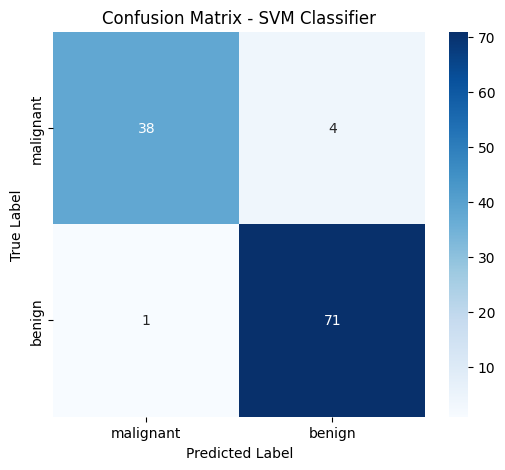


Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [24]:
#43: Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM Classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)
svm_clf.fit(X_train, y_train)

# 4. Predict on test set
y_pred = svm_clf.predict(X_test)

# 5. Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# 6. Visualize Confusion Matrix using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()

# 7. Optional: Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))



In [25]:
#44: Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

# Import libraries
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Feature scaling (important for SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

# 4. Train SVR model (using RBF kernel)
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)

# 5. Predict on test set
y_pred_scaled = svr.predict(X_test_scaled)

# Inverse transform predictions back to original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 6. Evaluate using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 0.3739065857811119


ROC-AUC Score: 0.9877645502645502


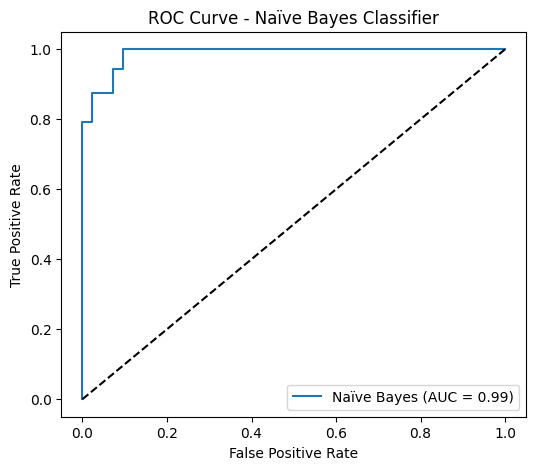

In [26]:
#45: Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

# Import libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train Naïve Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# 4. Predict probabilities on test set
y_proba = nb_clf.predict_proba(X_test)[:, 1]  # probability of positive class

# 5. Evaluate using ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

# 6. Optional: Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"Naïve Bayes (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naïve Bayes Classifier")
plt.legend(loc="lower right")
plt.show()


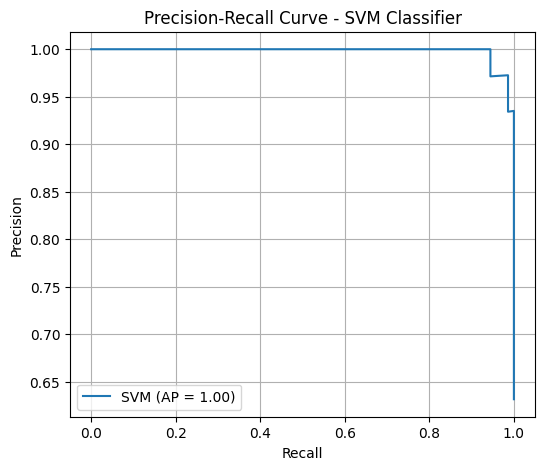

In [27]:
#46: Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve.

# Import libraries
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# 2. Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Train SVM Classifier with probability estimates enabled
svm_clf = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# 4. Predict probabilities for the positive class
y_scores = svm_clf.predict_proba(X_test)[:, 1]

# 5. Compute Precision-Recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# 6. Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, label=f"SVM (AP = {avg_precision:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - SVM Classifier")
plt.legend(loc="lower left")
plt.grid(True)
plt.show()

